# EDA with python for Titanic Dataset

EDA : Exploratory Data analysis

It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

# Importing the dependencies (libraries, modules)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

Loading the data into a pandas dataframe and getting general information like shape of the dataframe, no. of survived, statisitics of each column, getting the number of NaN values or missing values...

In [ ]:
ds = pd.read_csv('/content/titanic_train.csv')

In [ ]:
ds.head() # shows the first five rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ds.shape # shape of the dataframe

(891, 12)

In [ ]:
ds.info() # concise summary of the dataframe, datatype, missing values etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
ds['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
ds.describe() # general stats of the dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
ds.groupby('Survived').mean()

<ipython-input-14-2f8959c21ecd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ds.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


# EDA


## Missing values:

We can directly .isnull() function to see which values are NaN in each column  but it is not feasible for a large dataset, hence we prefer some visualization techniques like heatmaps, countplots etc..


<Axes: >

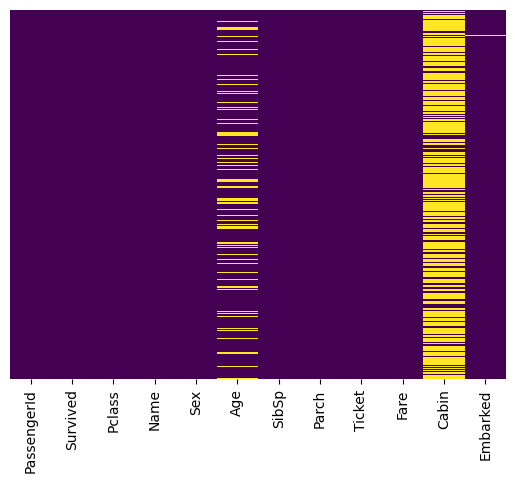

In [ ]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

About 20% of the Age data is missing, but it can be reasonably replaced with some form of imputation later on, like mean, median of the Age...

But the cabin, as we can see most of the data is missing, we'll probably drop it later.

## Number of survived passengers

<Axes: xlabel='Survived', ylabel='count'>

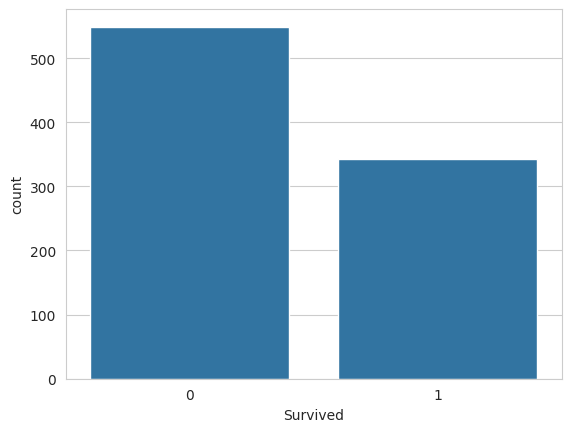

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = ds)

We can also differentiate survivors based on their sex:

<Axes: xlabel='Survived', ylabel='count'>

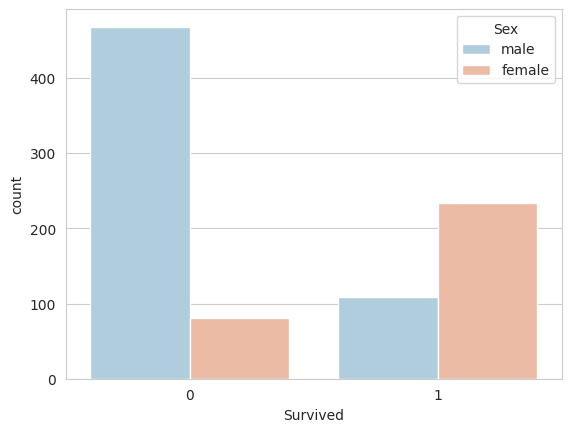

In [ ]:
sns.countplot(x = 'Survived', hue = 'Sex', data = ds, palette = 'RdBu_r')

<ipython-input-33-aeec1dff2387>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Survived', y = 'Sex', data = ds, palette = 'RdBu_r')


<Axes: xlabel='Survived', ylabel='Sex'>

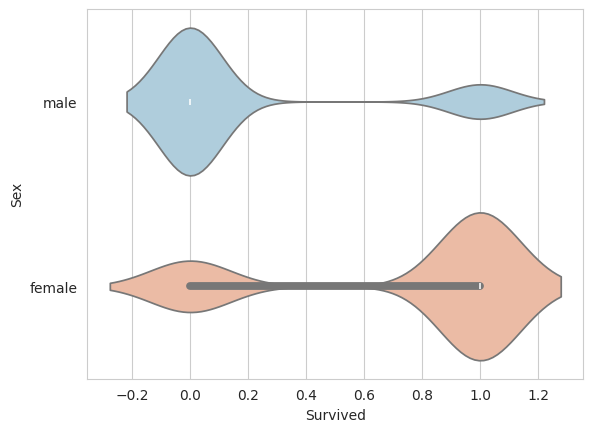

In [ ]:
sns.violinplot(x = 'Survived', y = 'Sex', data = ds, palette = 'RdBu_r')
# we can see from the plot that most of the survived passengers were female hence
# big hump at value 1 for females and so big hump at value 0 for males.

The distribution of survivors based on their class, Pclass, where Pclass = 1 means a richer class

<Axes: xlabel='Survived', ylabel='count'>

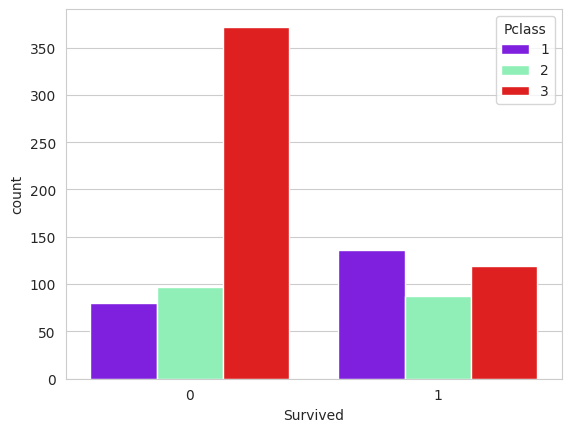

In [ ]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = ds, palette = 'rainbow')

<ipython-input-43-cda985ac98ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Survived', y = 'Pclass', data = ds, palette = 'rainbow')


<Axes: xlabel='Survived', ylabel='Pclass'>

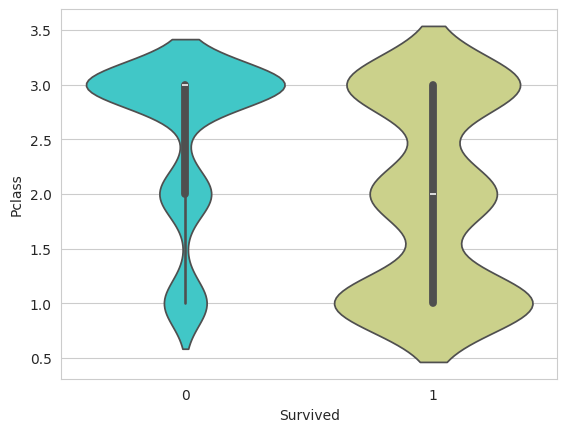

In [ ]:
sns.violinplot(x = 'Survived', y = 'Pclass', data = ds, palette = 'rainbow')

## Age Distribution

<ipython-input-47-e8966c096d86>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Age'].dropna(), kde = False, color = 'green')


<Axes: xlabel='Age'>

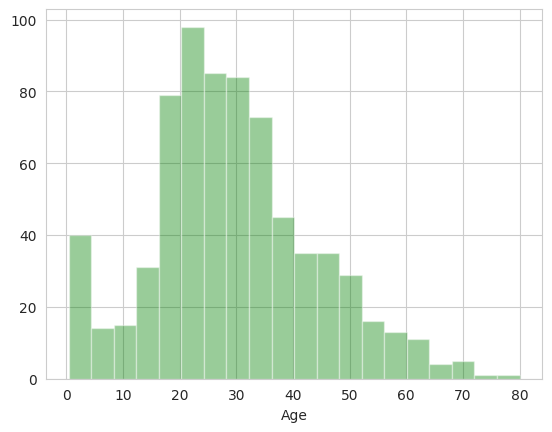

In [ ]:
sns.distplot(ds['Age'].dropna(), kde = False, color = 'green')

In [ ]:
print(f"The average age of the passengers is: {ds['Age'].dropna().mean()}")

The average age of the passengers is: 29.69911764705882


Let's see the survival rate of passengers across the age

<ipython-input-52-1a53c12e2076>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Survived', y = 'Age', data = ds, palette = 'RdBu_r')


<Axes: xlabel='Survived', ylabel='Age'>

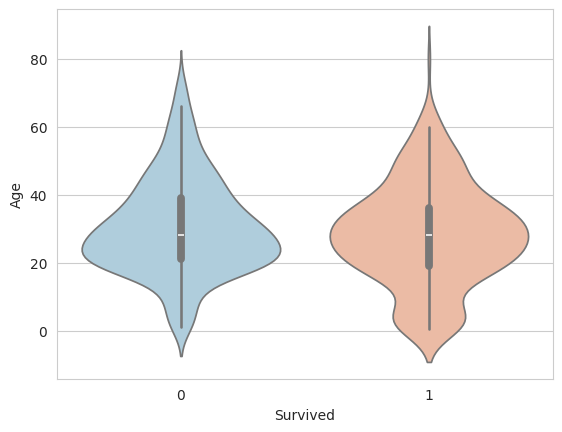

In [ ]:
sns.violinplot(x = 'Survived', y = 'Age', data = ds, palette = 'RdBu_r')

## Passengers with spouse or siblings

<ipython-input-61-e76066984d72>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'SibSp', data = ds, palette = 'rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

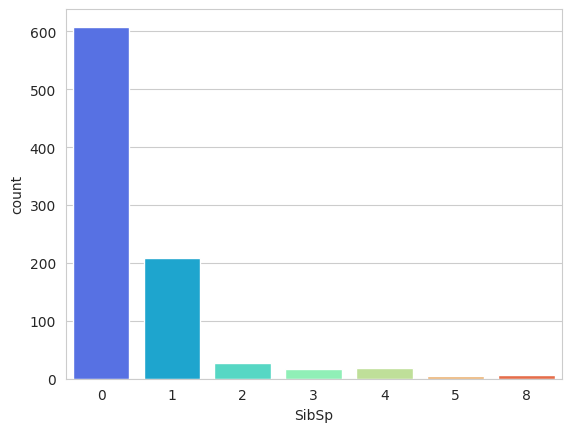

In [ ]:
sns.countplot(x = 'SibSp', data = ds, palette = 'rainbow')

<ipython-input-65-27b29947fcdd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'SibSp', y = 'Survived', data = ds, palette = 'rainbow')


<Axes: xlabel='SibSp', ylabel='Survived'>

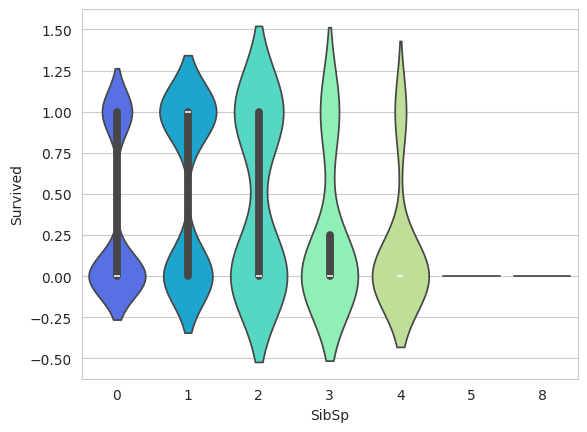

In [ ]:
sns.violinplot(x = 'SibSp', y = 'Survived', data = ds, palette = 'rainbow')


# Data Processing (cleaning):

<ipython-input-67-140736692caf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = ds, palette = 'winter')


<Axes: xlabel='Pclass', ylabel='Age'>

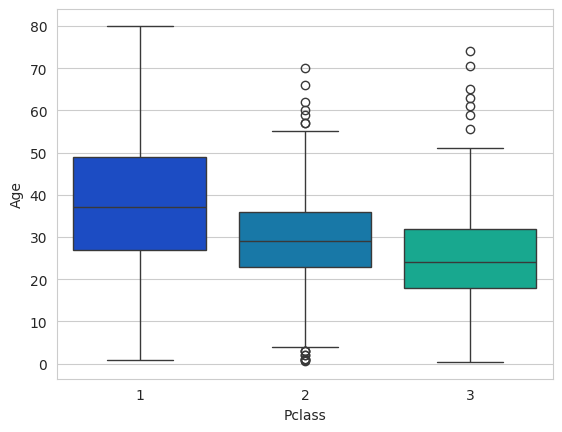

In [ ]:
sns.boxplot(x = 'Pclass', y = 'Age', data = ds, palette = 'winter')

The average age of each class are approximately:

1) Class 1: Avg. age = 37

2) Class 2: Avg. age = 28

3) Class 3: Avg. age = 24

In [ ]:
avg_age = {1: 37, 2: 28, 3: 24} # dictionary storing the avg. age of each class

def impute_age(row): # applied on each row of the dataset

    pclass = row['Pclass'] # getting the value of Pclass in each row
    if pd.isnull(row['Age']):   # if the age value is null in the current row, we replace with avg_age[pclass]
        return avg_age[pclass]
    else:
        return row['Age'] # if not null return same value

In [ ]:
ds['Age'] = ds.apply(impute_age, axis = 1) # axis = 1. means it is applied for each column rowwise,
# i.e the operation is horizontal along the columns

Now, once again let's check the heat map

<Axes: >

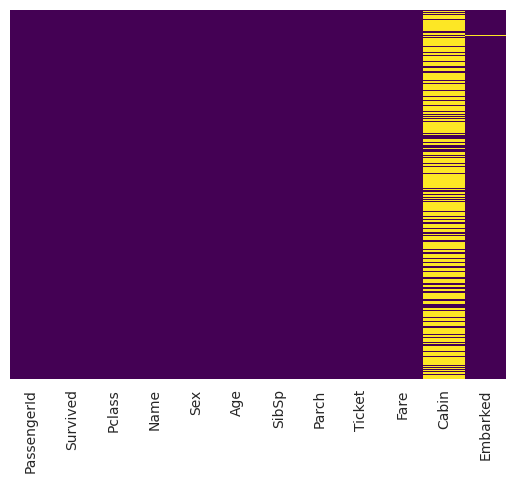

In [ ]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Let's go ahead and drop the cabin value and the row in Embarked column


In [ ]:
ds.drop('Cabin',axis = 1,inplace = True)

<Axes: >

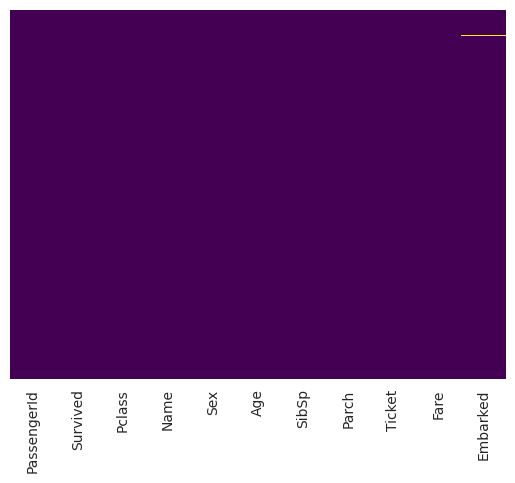

In [ ]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
ds.dropna(inplace = True)

<Axes: >

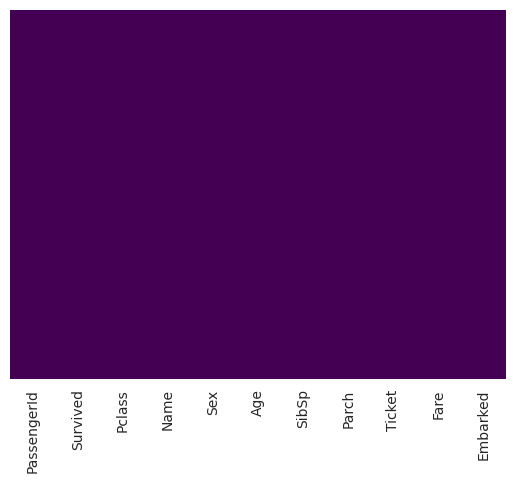

In [ ]:
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Converting Categorical Features:

We have to encode the categorical features like Sex, Embarked before passing to a Machine Learning model

WE can wither use Label Encoding or One Hot Encoding(better for variables which doesn't have any inherent order, like: Embarked(S,C,Q))

Label Encoder is to be imported from sklearn, while One Hot Encoder is already in pandas as get_dummies()

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Sex_male     889 non-null    uint8  
 10  Embarked_Q   889 non-null    uint8  
 11  Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 72.1+ KB


In [ ]:
ds = pd.get_dummies(data = ds, columns = ['Sex', 'Embarked'], drop_first = True)
# drop_first is to drop the first dummy column of the created ones

In [ ]:
ds.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


Dropping some unnecessary columns like Id, Name, Ticket etc..

In [ ]:
ds.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [ ]:
ds.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression

## Importing the dependencies

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Creating the Input and Output

In [ ]:
x = ds.drop('Survived',axis = 1)
y = ds['Survived']

In [ ]:
x.shape, y.shape

((889, 8), (889,))

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


## Split the data into training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 24)

In [ ]:
x_train.shape, x_test.shape

((666, 8), (223, 8))

## Model training

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [ ]:
x_train_pred = lr.predict(x_train)
training_accuracy = accuracy_score(x_train_pred,y_train)
print(f"The Accuracy of training data is: {training_accuracy}")

The Accuracy of training data is: 0.7882882882882883


## For Testing Data

In [ ]:
x_test_pred = lr.predict(x_test)
testing_accuracy = accuracy_score(x_test_pred, y_test)
print(f"The Accuracy for test data is: {testing_accuracy}")e

The Accuracy for test data is: 0.8654708520179372


## Classification report

In [ ]:
print(classification_report(y_test, x_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       143
           1       0.87      0.74      0.80        80

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



## Confusion Matrix

In [ ]:
print(f"The confusion matrix for the testing data is: \n {confusion_matrix(y_test,x_test_pred)}")

The confusion matrix for the testing data is: 
 [[134   9]
 [ 21  59]]
